In [16]:
import pandas as pd
import sqlite3

conn = sqlite3.connect("youtube_data.db")
df = pd.read_csv("Data/0.txt", sep="\t", header=None)

# compress the 10th column onward into one column without NaN values
df[9] = df.iloc[:, 9:].apply(lambda x: ','.join(x.dropna().astype(str)), axis=1)
# drop the 11th column onward
df.drop(df.iloc[:, 10:], inplace=True, axis=1)
df.columns = ["video ID", "uploader", "age", "category", "length", "views", "rate", "ratings", "comments", "Related IDs"]
df.to_sql('my_table', conn, if_exists='replace', index=False)
cursor =conn.cursor()

cursor.execute('SELECT * FROM my_table WHERE my_table.age == 653')
result = cursor.fetchall()
print(result) 
# hello
conn.close()
df.head(100)

[('LKh7zAJ4nwo', 'TheReceptionist', 653, 'Entertainment', 424, 13021, 4.34, 1305, 744, 'DjdA-5oKYFQ,NxTDlnOuybo,c-8VuICzXtU,DH56yrIO5nI,W1Uo5DQTtzc,E-3zXq_r4w0,1TCeoRPg5dE,yAr26YhuYNY,2ZgXx72XmoE,-7ClGo-YgZ0,vmdPOOd6cxI,KRHfMQqSHpk,pIMpORZthYw,1tUDzOp10pk,heqocRij5P0,_XIuvoH6rUg,LGVU5DsezE0,uO2kj6_D8B4,xiDqywcDQRM,uX81lMev6_o')]


,video ID,uploader,age,category,length,views,rate,ratings,comments,Related IDs
0,LKh7zAJ4nwo,TheReceptionist,653,Entertainment,424,13021,4.34,1305,744,"DjdA-5oKYFQ,NxTDlnOuybo,c-8VuICzXtU,DH56yrIO5n..."
1,7D0Mf4Kn4Xk,periurban,583,Music,201,6508,4.19,687,312,"e2k0h6tPvGc,yuO6yjlvXe8,VqpnWBo-R4E,bdDskrr8jR..."
2,n1cEq1C8oqQ,Pipistrello,525,Comedy,125,1687,4.01,363,141,"eprHhmurMHg,i30NkTJOrak,2XtLgZol5wI,3nH5Tccz8E..."
3,OHkEzL4Unck,ichannel,638,Comedy,299,8043,4.40,518,371,"eyUSTmEUQRg,FDIH1GNQXQE,Wtj31off8-I,mDjwzhc8dQ..."
4,-boOvAGNKUc,mrpitifulband,639,Music,287,7548,4.48,606,386,"fmUwUURgsX0,bR27ACWomug,LlH7WcVptw8,saBmFpuwmK..."
...,...,...,...,...,...,...,...,...,...,...
95,MNxwAU_xAMk,j0sealan,538,Comedy,140,7066676,4.56,14786,7302,"MNxwAU_xAMk,JlfXGGkUcJQ,jwWv2IHywDQ,iqLRRDrHrJ..."
96,RUCZJVJ_M8o,markleung,337,Entertainment,11,6952767,4.21,13932,2558,"RUCZJVJ_M8o,2dE-W9dotQ4,uFoWXi25RBk,0fIeT7zKxR..."
97,HSEnYYpE_V8,boh3m3,736,News & Politics,571,6677,4.72,522,325,"HNcsMlhQdIs,vuUiYEKptAU,bGasrI7m7so,as3DH05Mbk..."
98,FM1KUDE3C3k,renetto,736,News & Politics,1063,9062,4.57,525,488,"LnMvSxl0o0A,IKMtzNuKQso,Bq8ubu7WHkY,Su0VTfwia1..."


{'LKh7zAJ4nwo': ['DjdA-5oKYFQ', 'NxTDlnOuybo', 'c-8VuICzXtU', 'DH56yrIO5nI', 'W1Uo5DQTtzc', 'E-3zXq_r4w0', '1TCeoRPg5dE', 'yAr26YhuYNY', '2ZgXx72XmoE', '-7ClGo-YgZ0', 'vmdPOOd6cxI', 'KRHfMQqSHpk', 'pIMpORZthYw', '1tUDzOp10pk', 'heqocRij5P0', '_XIuvoH6rUg', 'LGVU5DsezE0', 'uO2kj6_D8B4', 'xiDqywcDQRM', 'uX81lMev6_o'], '7D0Mf4Kn4Xk': ['e2k0h6tPvGc', 'yuO6yjlvXe8', 'VqpnWBo-R4E', 'bdDskrr8jRY', 'y3IDp2n7B48', 'JngPWhfCb2M', 'KQaUvH5oiO4', 'NSzrwv5MCwc', 'NHB0a0xtLgU', 'DlRodd4s86s', 'EzKwOYLh-S0', 'eUIfRyrqwp8', 'AK8Wtfwe-1k', 'Eq4hGkIqBGw', 'N1lkLaLJHlc', '-uIffs-DHkM', 'zpTorUhCd8Y', 'AvSK0qPw7EU', 'WX5KLMqY4bM', 'VKFqqoeMdjw'], 'n1cEq1C8oqQ': ['eprHhmurMHg', 'i30NkTJOrak', '2XtLgZol5wI', '3nH5Tccz8EQ', 'bSPVayE0NhE', 'sEqCkwPmQ_w', 'hut3VRL5XRE', 'bWlPSLUT-6U', 'dsBTo5LExr0', '7PSvpPXppXA', 'yLup8wjbSIo', 'lbf4d1pZI9c', 'uRQYan_-CTQ', 'gnpvEvuiFoQ', 'F2_5KOnSsfI', 'DINu35v3eMU', '9uSiyn7t_0o', 'YfShxdbAJS8', 'ssdfqTwZXY0', 'z5wDjq8o60c'], 'OHkEzL4Unck': ['eyUSTmEUQRg', 'FDIH1GNQXQE', 'W

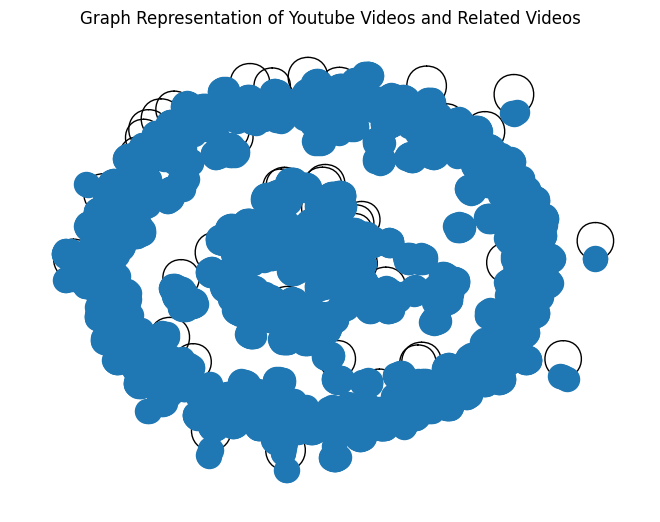

In [54]:
# Read youtube data
import pandas as pd
import networkx as nx
df = pd.read_csv("Data/0.txt", sep="\t", header=None)
#9th column onwards are related videos
df[9] = df.iloc[:, 9:].apply(lambda x: ','.join(x.dropna().astype(str)), axis=1)
# convert make adjacency list of video ids and related video ids using maps
adj_list = df.iloc[:, [0, 9]].set_index(0).to_dict()[9]
# separate related video ids into a list
adj_list = {k: v.split(",") for k, v in adj_list.items()}
print(adj_list)
# make graph
G = nx.from_dict_of_lists(adj_list)
# Randomly delete most of the nodes to make the graph look nicer
import random
nx.draw(G)
plt.title("Graph Representation of Youtube Videos and Related Videos")
print(G)
nx.draw(G)
plt.title("Graph Representation of Youtube Videos and Related Videos")
plt.show()
# Look at video with id LKh7zAJ4nwo
#print(G["LKh7zAJ4nwo"]) # returns dict of related videos


In [55]:

# Find which video has the most related videos
max_degree = 0
max_video = ""
for video in G.nodes():
    if G.degree(video) > max_degree:
        max_degree = G.degree(video)
        max_video = video
print("Video with the most related videos: ", max_video, "with", max_degree, "related videos")


Video with the most related videos:  V6k3YlcYtS0 with 24 related videos


In [61]:

# Implement pagerank
pagerank = nx.pagerank(G)
print(pagerank)
# Find which video has the highest pagerank
max_pagerank = 0
max_video = ""
for video in pagerank:
    if pagerank[video] > max_pagerank:
        max_pagerank = pagerank[video]
        max_video = video
print("Video with the highest pagerank: ", max_video, "with", max_pagerank, "pagerank")

{'LKh7zAJ4nwo': 0.0029029725520111657, '7D0Mf4Kn4Xk': 0.0029029725520111657, 'n1cEq1C8oqQ': 0.0029029725520111657, 'OHkEzL4Unck': 0.0029029725520111657, '-boOvAGNKUc': 0.0029029725520111657, 'hFFH8DaOHQg': 0.0028256492414296857, 'LzHjIj3fpR8': 0.0029029725520111657, 'SDNkMu8ZT68': 0.00029770765108663293, 'PkGUU_ggO3k': 0.0028256492414296857, 'RX24KLBhwMI': 0.0029029725520111657, 'MEvoy_owET8': 0.0028289837244387123, 'w6Pbyg_kcEk': 0.0029029725520111657, 'Qehxjub5lyo': 0.0029029725520111657, 'sRnLdmvQBsI': 0.0028115597484699544, 'xGn0q1zoibw': 0.0028115597484699544, 'zRVts7TFw-Y': 0.0029029725520111657, '_5QUdvUhCZc': 0.0029029725520111657, 'D6U6GxnvlE8': 0.0029029725520111657, 'OUi9-jqq_i0': 0.0028180068035210293, 'bqZauhidT1w': 0.0029029725520111657, 'fQShwYqGqsw': 0.0007797108208620243, 'mWzdp7Cg41w': 0.0029029725520111657, '-keC9GymLpI': 0.0028957135250139068, 'H-ucblRMjuY': 0.0029029725520111657, 'jDRENHHatx4': 0.0029029725520111657, 'ztIH6tc6Aa4': 0.002321913401263354, 'l69Vi5IDc0

In [63]:
# top-k most influential videos
# Check the properties of these videos (# of views, # edges, category…). What can we find out? Present your findings.
import heapq
k = 10
top_k = heapq.nlargest(k, pagerank, key=pagerank.get)
print(top_k)
avg_views = 0
avg_edges = 0
categories = {}
for video in top_k:
    avg_views += df[df[0] == video][5].values[0]
    avg_edges += G.degree(video)
    category = df[df[0] == video][3].values[0]
    if category in categories:
        categories[category] += 1
    else:
        categories[category] = 1

print("Average views of top", k, "videos:", avg_views/k)
print("Average edges of top", k, "videos:", avg_edges/k)
print("Categories of top", k, "videos:", categories)

['wTNlWRbRtS0', 'O9mEKMz2Pvo', 'P1OXAQHv09E', 'c6SHsF1n9Qw', 'LKh7zAJ4nwo', '7D0Mf4Kn4Xk', 'n1cEq1C8oqQ', 'OHkEzL4Unck', '-boOvAGNKUc', 'LzHjIj3fpR8']
Average views of top 10 videos: 470866.9
Average edges of top 10 videos: 20.5
Categories of top 10 videos: {'Comedy': 5, 'Music': 4, 'Entertainment': 1}


In [52]:
# Relationship between pagerank and views